In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
# Import data
sales = pd.read_excel('7-Data_sales.xlsx',sheet_name='sales data')

In [59]:
sales.describe()

,Store ID,store size,Dept ID,Weekly_Sales ($),Unemployment %,CPI,Temperature (F),Fuel_Price
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,136727.915739,44.260317,15981.258123,7.636399,184.963878,61.266910,3.354980
std,12.785297,60980.583328,30.492054,22711.183519,0.888184,39.005405,18.198682,0.510137
min,1.000000,34875.000000,1.000000,-4988.940000,4.420000,126.793400,19.530000,2.514000
25%,11.000000,93638.000000,18.000000,2079.650000,7.057000,135.446800,48.100000,2.759000
50%,22.000000,140167.000000,37.000000,7612.030000,7.771000,211.108414,64.520000,3.417000
75%,33.000000,202505.000000,74.000000,20205.852500,7.808000,219.355063,77.530000,3.796000
max,45.000000,219622.000000,99.000000,693099.360000,14.313000,222.074763,91.570000,4.211000


In [62]:
print(sales['Store ID'].unique())
print(sales['Dept ID'].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 40 41 42 44 45 46 47 48 49 51 52
 54 55 56 58 59 60 67 71 72 74 77 78 79 80 81 82 83 85 87 90 91 92 93 94
 95 96 97 98 99 39 50 43 65]


In [63]:
sales['Date']

0        2010-02-05
1        2010-02-12
2        2010-02-19
3        2010-02-26
4        2010-03-05
            ...    
421565   2012-09-28
421566   2012-10-05
421567   2012-10-12
421568   2012-10-19
421569   2012-10-26
Name: Date, Length: 421570, dtype: datetime64[ns]

In [5]:
sales['Weekly_Sales ($)'].describe()

count    421570.000000
mean      15981.258123
std       22711.183519
min       -4988.940000
25%        2079.650000
50%        7612.030000
75%       20205.852500
max      693099.360000
Name: Weekly_Sales ($), dtype: float64

In [6]:
under_zero= sales[sales['Weekly_Sales ($)']<0].index
outlier= sales[sales['Weekly_Sales ($)']>200000].count()
print(outlier)

Store ID            163
store size          163
Dept ID             163
Date                163
Weekly_Sales ($)    163
IsHoliday           163
Unemployment %      163
CPI                 163
Temperature (F)     163
Fuel_Price          163
dtype: int64


In [7]:
sales_=sales.drop(under_zero)
sales_['Weekly_Sales ($)'].describe()

count    420285.000000
mean      16030.329773
std       22728.500149
min           0.000000
25%        2117.560000
50%        7659.090000
75%       20268.380000
max      693099.360000
Name: Weekly_Sales ($), dtype: float64

## Sample Distribution, Normal Distribution, Simple Random Sampling for Confidence Interval

In [65]:
xbar_=[]
for i in range(30):
    x_mean = round(sales_.sample(n=30,random_state=None)['Weekly_Sales ($)'].mean())
    xbar_.append(x_mean)
print(xbar_)

[14130, 19401, 17126, 16610, 22671, 12604, 15533, 15325, 17618, 20306, 15064, 16526, 16147, 11702, 17226, 21594, 18443, 20971, 19098, 14935, 15101, 25167, 17179, 15001, 21186, 10545, 18585, 19192, 16866, 14545]


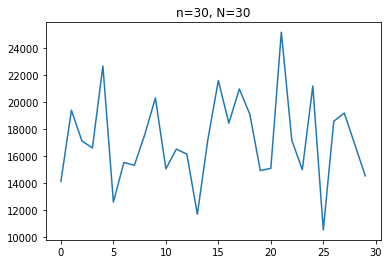

In [67]:
plt.title('n=30, N=30')
plt.plot(xbar_)
plt.show()

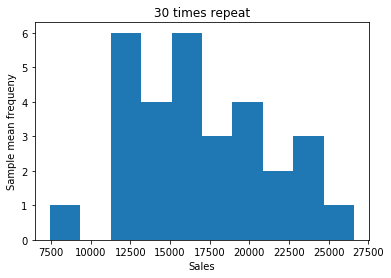

mean of mean of samples: 16860.5
mean of population: 16030


In [45]:
plt.title('30 times repeat')
plt.xlabel('Sales')
plt.ylabel('Sample mean frequeny')

plt.hist(xbar_)
plt.show()
print('mean of mean of samples: ' + str(np.array(xbar_).mean()))
print('mean of population: 16030' )

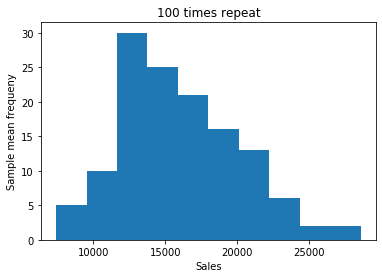

In [46]:
for i in range(100):
    x_mean = round(sales_.sample(n=30,random_state=None)['Weekly_Sales ($)'].mean())
    xbar_.append(x_mean)
plt.title('100 times repeat')
plt.xlabel('Sales')
plt.ylabel('Sample mean frequeny')

plt.hist(xbar_)
plt.show()

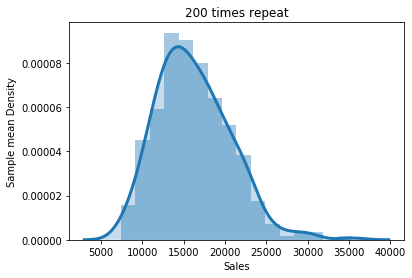

In [47]:
for i in range(200):
    x_mean = round(sales_.sample(n=30,random_state=None)['Weekly_Sales ($)'].mean())
    xbar_.append(x_mean)
plt.title('200 times repeat')
plt.xlabel('Sales')
plt.ylabel('Sample mean Density')

sns.distplot(xbar_, hist=True, kde=True, kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = i)

In [9]:
# Assume that we do not know mean and SD of population. 
# We are simple sampling twice, n size 30 and n size 100.
# And we want to know mean and SD of sample.
# I am going to estimate the range of mean of population with 95% confidence interval.

In [68]:
xbar = sales_.sample(n=30, random_state=42)['Weekly_Sales ($)'].mean()
sd = sales_.sample(n=30, random_state=42)['Weekly_Sales ($)'].std()
print(xbar)
print(sd)
# DF = 30 - 1
# T-table 95% two-tailed test alpha = 2.0452
# T-table 99% two-tailed test alpha = 1.6991

# 95% confident interval, sample size 30.
print('95% confidence interval, 30 sample')
print(str(round(xbar-2.0452 * sd/5.4)) + ' < mu < ' + str(round(xbar+2.0452 * sd/5.4)))

# 99% confident interval, sample size 30.
print('-'*100)
print('99% confidence interval, 30 sample')
print(str(round(xbar-2.7564 * sd/5.4)) + ' < mu < ' + str(round(xbar+2.7564 * sd/5.4)))

# increased confident interval, widened mean of population range as well.

20745.39033333333
21802.54857833344
95% confidence interval, 30 sample
12488 < mu < 29003
----------------------------------------------------------------------------------------------------
99% confidence interval, 30 sample
9616 < mu < 31874


In [69]:
xbar2 = sales_.sample(n=100, random_state=42)['Weekly_Sales ($)'].mean()
sd2 = sales_.sample(n=100, random_state=42)['Weekly_Sales ($)'].std()
print(xbar2)
print(sd2)

# DF = 100 - 1
# T-table 95% two-tailed test alpha = 1.984
# T-table 99% two-tailed test alpha = 2.625

# 95% confident interval, sample size 100.
print('95% confidence interval, 100 sample')
print(str(round(xbar2-1.984 * sd2/10)) + ' < mu < ' + str(round(xbar2+1.984 * sd2/10)))
print('-'*100)

# # 99% confident interval, sample size 100.
print('99% confidence interval, 100 sample')
print(str(round(xbar2- 2.6259 * sd2/10)) + ' < mu < ' + str(round(xbar2+ 2.6259 * sd2/10)))

17890.74
22020.199130636836
95% confidence interval, 100 sample
13522 < mu < 22260
----------------------------------------------------------------------------------------------------
99% confidence interval, 100 sample
12108 < mu < 23673
